In [7]:
import kagglehub as kh
import os.path as path
import os
import pandas as pd

means_monday, means_other = [], []

p = kh.dataset_download('borismarjanovic/price-volume-data-for-all-us-stocks-etfs')
p = path.join(p, "Data/Stocks")
dir_list = os.listdir(p)
for i in dir_list:
  try:
    df = pd.read_csv(path.join(p, i))
    means_monday.append(df[pd.to_datetime(df['Date']).dt.strftime("%A") == 'Monday']['Close'].mean())
    means_other.append(df[pd.to_datetime(df['Date']).dt.strftime("%A") != 'Monday']['Close'].mean())
  except Exception as e:
    pass
print(means_other)
print(means_monday)

[np.float64(27.892895072148107), np.float64(24.443655203434883), np.float64(37.2826213592233), np.float64(25.408120249433107), np.float64(19.42170846394984), np.float64(41.13756343283581), np.float64(275.23981172273193), np.float64(2.8026589145982332), np.float64(23.185975778546712), np.float64(24.604245562130174), np.float64(12.54562983467897), np.float64(79.53811803152634), np.float64(22.323497628668335), np.float64(31.057218481375358), np.float64(1.7717037969779155), np.float64(7.7722529796232225), np.float64(44.411817365967366), np.float64(11.986449980776623), np.float64(22.968703537101113), np.float64(6.591318880647337), np.float64(31.77361999231065), np.float64(16.419976855055747), np.float64(54.08731690140844), np.float64(29.177931212121212), np.float64(19.242154094579007), np.float64(3.238872045028142), np.float64(34.50443248750481), np.float64(10.351350069541029), np.float64(11.602714241605558), np.float64(5.5404634064080955), np.float64(3.190812200956937), np.float64(5.022972

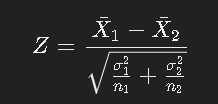

In [8]:
import numpy as np
import math

monday_var = np.nanvar(means_monday)
other_var = np.nanvar(means_other)
n = len(means_other)

Z = (np.nanmean(means_monday) - np.nanmean(means_other)) / math.sqrt((monday_var + other_var) / n)
Z

np.float64(0.008677277655022186)

In [9]:
from scipy.stats import norm

alpha = 0.05 
c = norm.ppf(1 - alpha / 2)
c

np.float64(1.959963984540054)

In [10]:
if -c < Z < c:
  print("stock prices on Mondays and other days are almost identical")
else:
  print("stock prices on Mondays and other days are not identical")

stock prices on Mondays and other days are almost identical
